# Binding Energy per Nucleon

We can explore and plot the binding energy per nucleon to understand when fusion and fission operate.

In [1]:
import pynucastro as pyna

First we'll get all nuclei with known masses and look at the binding energy

In [2]:
nuclei = pyna.get_all_nuclei()

In [3]:
len(nuclei)

3558

We see there are > 3500 nuclei with measured masses

## Most tightly bound nucleus

We can easily find the nucleus that is most tightly bound

In [4]:
nuc_bound = max(nuclei, key=lambda n : n.nucbind)
nuc_bound

Ni62

## Binding energy plot

Now we can make a plot of binding energy per nucleon for all nuclei

In [5]:
As = [n.A for n in nuclei]
BEs = [n.nucbind for n in nuclei]

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'binding energy per nucleon (MeV)')

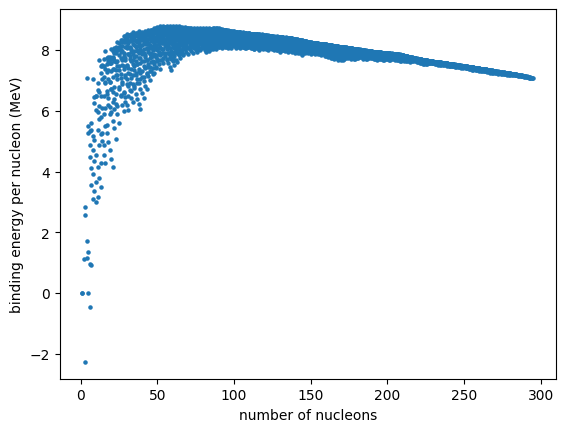

In [7]:
fig, ax = plt.subplots()
ax.scatter(As, BEs, s=5)
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon (MeV)")

## Cleaner plot

We see that there is quite a spread in binding energy for each nucleon count.  We can instead consider only the most tightly bound nucleus at each mass number.  We will also
only consider those that are stable (or have half lives > 1 million years)

In [8]:
max_A = max(As)
max_A

295

In [9]:
nuc = []

1 million years in seconds

In [10]:
million_years = 1.e6 * 365.25 * 24 * 3600

In [11]:
for A in range(1, max_A+1):
    # for mass number A, find the nucleus with the maximum binding energy
    try:
        _new = max((n for n in nuclei
                    if n.A == A and (n.tau == "stable" or
                                     (n.tau is not None and n.tau > million_years))),
                   key=lambda q: q.nucbind)
    except ValueError:
        # no stable nucleus of this mass
        continue
    nuc.append(_new)

We now plot just these most tightly bound nuclei

In [12]:
As = [n.A for n in nuc]
BEs = [n.nucbind for n in nuc]

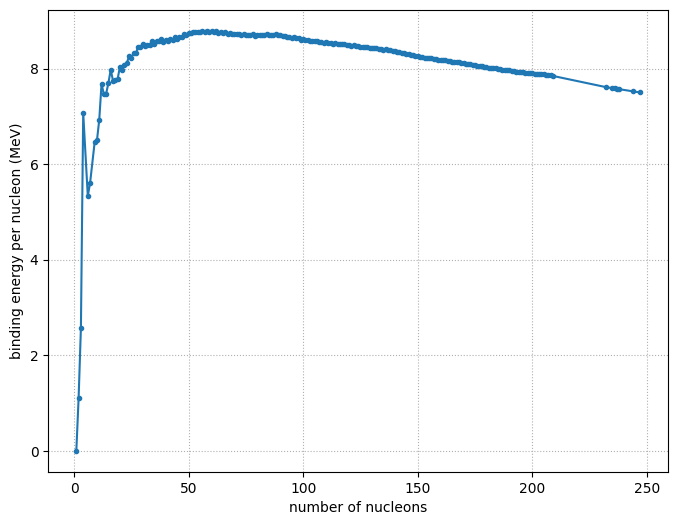

In [13]:
fig, ax = plt.subplots()
ax.plot(As, BEs, marker="o", markersize="3")
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon (MeV)")
ax.grid(ls=":")
fig.set_size_inches((8, 6))

## Visualizing as function of (N, Z)

We want to visualize the mass excess and binding energy in the $Z$-$N$ plane.
First let's get the extent of $N$ and $Z$ in our nucleus list.

In [14]:
max_Z = max(nuclei, key=lambda n : n.Z).Z
max_N = max(nuclei, key=lambda n : n.N).N

and the maximum absolute value of the mass excess (in MeV)

In [15]:
dm_mag = abs(max(nuclei, key=lambda n: abs(n.dm)).dm)
dm_mag

201.37

Now we'll create an array to store dm(Z, N) and be(Z, N) and loop over all the nuclei and store each mass excess and binding energy / nucleon.

In [16]:
import numpy as np
dm = np.zeros((max_Z+1, max_N+1))
be = np.zeros((max_Z+1, max_N+1))

We'll initialize these to NaN so we can mask out the regions where there are no nuclei

In [17]:
dm[:,:] = np.nan
be[:,:] = np.nan

In [18]:
for n in nuclei:
    dm[n.Z, n.N] = n.dm
    be[n.Z, n.N] = n.nucbind

```{note}
Due to mass excess estimation in the nuclear databases, a few nuclei have negative binding energies.
```

In [19]:
n = [n for n in nuclei if n.nucbind < 0]
n

[Li3, B6]

Finally, we can plot

In [20]:
import matplotlib as mpl

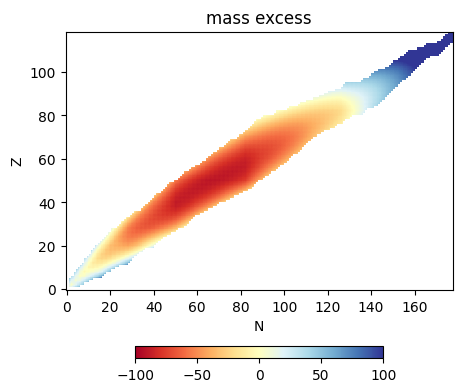

In [21]:
# mask out the regions with no nuclei
cmap = mpl.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

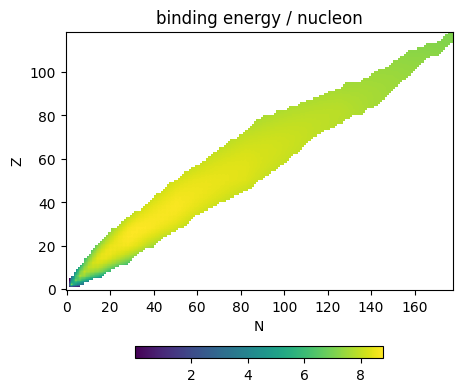

In [22]:
# mask out the regions with no nuclei
cmap = mpl.colormaps['viridis']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(be, origin="lower", cmap=cmap,
               vmin=0.01, vmax=np.nanmax(be))
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("binding energy / nucleon")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)